In [142]:
##Importing data

In [225]:
import pandas as pd

data = pd.read_csv('mrip_catch_snapshot.csv', header=0)
print(data.head())

  Estimate Status  Year         Wave Fishing Mode Fishing Area  \
0           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
1           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
2           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
3           FINAL  2010  MARCH/APRIL        SHORE       INLAND   
4           FINAL  2010  MARCH/APRIL        SHORE       INLAND   

          Species Group             Sub Group  Observed Harvest (A)   PSE  \
0  CARTILAGINOUS FISHES           SKATES/RAYS                     0     .   
1             CATFISHES  FRESHWATER CATFISHES                 35600  63.5   
2          OTHER FISHES          OTHER FISHES                 53567  60.7   
3      TEMPERATE BASSES          STRIPED BASS                     0     .   
4      TEMPERATE BASSES           WHITE PERCH               1313617  60.8   

   Reported Harvest (B1) PSE.1  Released Alive (B2)  PSE.2  
0                      0     .                10143  105.8  
1                 

In [226]:
catch_effort = pd.read_csv('mrip_effort_series.csv', header=0)
print(catch_effort.head())

  Estimate Status  Year         Wave  Fishing Mode     Fishing Area  \
0           FINAL  2010  MARCH/APRIL         SHORE  OCEAN (<= 3 MI)   
1           FINAL  2010  MARCH/APRIL         SHORE           INLAND   
2           FINAL  2010  MARCH/APRIL    PARTY BOAT   OCEAN (> 3 MI)   
3           FINAL  2010  MARCH/APRIL    PARTY BOAT           INLAND   
4           FINAL  2010  MARCH/APRIL  CHARTER BOAT   OCEAN (> 3 MI)   

   Angler Trips    PSE  
0          4436  109.6  
1        730139   19.1  
2           788    8.6  
3             2    8.6  
4             7   17.3  


In [227]:
df = pd.merge(data, catch_effort, how='left', on=['Year', 'Wave', 'Fishing Mode', 'Fishing Area'])


In [228]:
df.rename(columns = {'Observed Harvest (A)':'A', 'Reported Harvest (B1)':'B1', 'Released Alive (B2)':'B2'}, inplace = True) 

In [229]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Estimate Status_x  2848 non-null   object
 1   Year               2848 non-null   int64 
 2   Wave               2848 non-null   object
 3   Fishing Mode       2848 non-null   object
 4   Fishing Area       2848 non-null   object
 5   Species Group      2848 non-null   object
 6   Sub Group          2848 non-null   object
 7   A                  2848 non-null   int64 
 8   PSE_x              2848 non-null   object
 9   B1                 2848 non-null   int64 
 10  PSE.1              2848 non-null   object
 11  B2                 2848 non-null   int64 
 12  PSE.2              2848 non-null   object
 13  Estimate Status_y  2848 non-null   object
 14  Angler Trips       2848 non-null   int64 
 15  PSE_y              2848 non-null   object
dtypes: int64(5), object(11)
memory usage: 378.

In [148]:
## Eploring data...

#Columns: Year - Year
#    Wave - 2 month period 
#   Fishing Mode - where fishing took place (from shore or type of boat)
#   Fishing Area - inland (but not freshwater), near-shore (within 3 miles of shore), and off-shore (over 3 miles from shore)
#   Species Group - Type of fish
#   Subgroup - More specific description of fish
#   A - Observed Harvest - NOAA official observed
#   PSE - Percent standard error. Error over 50 indicates a pretty unreliable number
#   B1 - Reported Harvest - Fisher reported but was not observed by NOAA
#   B2 - Released Alive - fish were caught and released
#   Angler Trips - number of trips reported to NOAA 
#   PSE_y - Percent standard error in angler trip number

In [230]:
df['total'] = df.A + df.B1 + df.B2
#Total - Observed Harvest + Reported Harvest + Released Alive


In [234]:
df1 = df.drop(columns=['Estimate Status_x', 'Estimate Status_y', 'A', 'PSE_x', 'PSE.1', 'B1', 'B2', 'PSE.2', 'PSE_y'])
#dropping columns with no use

In [151]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [235]:
df1.rename(columns={"Species Group": "SpecGroup", "Sub Group": "SubGroup"}, inplace=True)

In [153]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.cluster import KMeans

In [236]:
df1.head()

,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,Angler Trips,total
0,2010,MARCH/APRIL,SHORE,INLAND,CARTILAGINOUS FISHES,SKATES/RAYS,730139,10143
1,2010,MARCH/APRIL,SHORE,INLAND,CATFISHES,FRESHWATER CATFISHES,730139,96256
2,2010,MARCH/APRIL,SHORE,INLAND,OTHER FISHES,OTHER FISHES,730139,337713
3,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,STRIPED BASS,730139,714968
4,2010,MARCH/APRIL,SHORE,INLAND,TEMPERATE BASSES,WHITE PERCH,730139,2616125


In [237]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2848 non-null   int64 
 1   Wave          2848 non-null   object
 2   Fishing Mode  2848 non-null   object
 3   Fishing Area  2848 non-null   object
 4   SpecGroup     2848 non-null   object
 5   SubGroup      2848 non-null   object
 6   Angler Trips  2848 non-null   int64 
 7   total         2848 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 200.2+ KB
None


In [238]:
#transform 'Fishing Mode' and 'Fishing Area' colums into numerical values
le = LabelEncoder().fit(df1['Fishing Mode'])
df1['Fishing Mode'] = le.transform(df1['Fishing Mode'])

ld = LabelEncoder().fit(df1['Fishing Area'])
df1['Fishing Area'] = ld.transform(df1['Fishing Area'])

ls = LabelEncoder().fit(df1['SpecGroup'])
df1['SpecGroup'] = ls.transform(df1['SpecGroup'])

lw = LabelEncoder().fit(df1['Wave'])
df1['Wave'] = lw.transform(df1['Wave'])
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          2848 non-null   int64 
 1   Wave          2848 non-null   int32 
 2   Fishing Mode  2848 non-null   int32 
 3   Fishing Area  2848 non-null   int32 
 4   SpecGroup     2848 non-null   int32 
 5   SubGroup      2848 non-null   object
 6   Angler Trips  2848 non-null   int64 
 7   total         2848 non-null   int64 
dtypes: int32(4), int64(3), object(1)
memory usage: 155.8+ KB
None


In [239]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ls.inverse_transform(df1['SpecGroup']))
d = dict(zip(ls.classes_, ls.transform(ls.classes_)))
print (d)

{'BLUEFISH': 0, 'CARTILAGINOUS FISHES': 1, 'CATFISHES': 2, 'CODS AND HAKES': 3, 'DOLPHINS': 4, 'DRUMS': 5, 'EELS': 6, 'FLOUNDERS': 7, 'GRUNTS': 8, 'HERRINGS': 9, 'JACKS': 10, 'OTHER FISHES': 11, 'PORGIES': 12, 'PUFFERS': 13, 'SCULPINS': 14, 'SEA BASSES': 15, 'SEAROBINS': 16, 'TEMPERATE BASSES': 17, 'TOADFISHES': 18, 'TRIGGERFISHES/FILEFISHES': 19, 'TUNAS AND MACKERELS': 20, 'WRASSES': 21}


In [240]:
#tried to make a dictionary to show the old name of 'Fishing Area : New Key, but it's not working
L = list(ld.inverse_transform(df1['Fishing Area']))
d = dict(zip(ld.classes_, ld.transform(ld.classes_)))
print (d)

{'INLAND': 0, 'OCEAN (<= 3 MI)': 1, 'OCEAN (> 3 MI)': 2}


In [241]:
L = list(le.inverse_transform(df1['Fishing Mode']))
d = dict(zip(le.classes_, le.transform(le.classes_)))
print (d)

{'CHARTER BOAT': 0, 'PARTY BOAT': 1, 'PRIVATE/RENTAL BOAT': 2, 'SHORE': 3}


In [242]:
L = list(lw.inverse_transform(df1['Wave']))
d = dict(zip(lw.classes_, lw.transform(lw.classes_)))
print (d)

{'JULY/AUGUST': 0, 'MARCH/APRIL': 1, 'MAY/JUNE': 2, 'NOVEMBER/DECEMBER': 3, 'SEPTEMBER/OCTOBER': 4}


<AxesSubplot:xlabel='Wave', ylabel='count'>

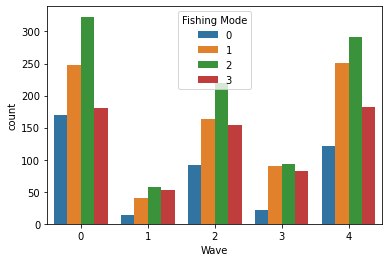

In [210]:
#I think this is a useless graph. count plot of fishing mode in each year. but the counts in the dataframe each have their own number of trips recorded?
sns.countplot(x='Wave',hue='Fishing Mode',data=df)

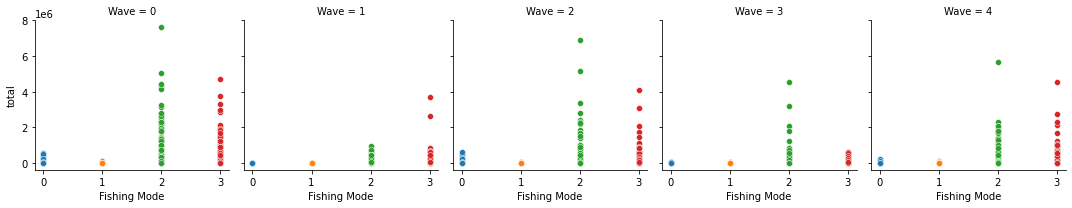

In [211]:
g = sns.FacetGrid(col='Wave',hue='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Fishing Mode','total')

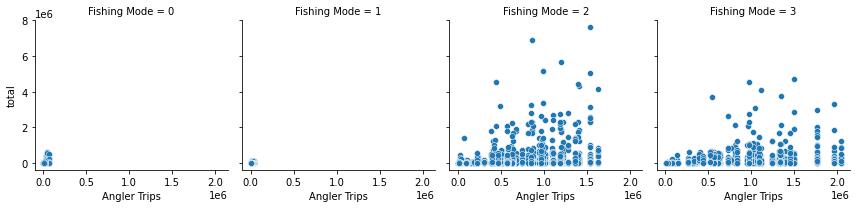

In [212]:
g = sns.FacetGrid(col='Fishing Mode',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

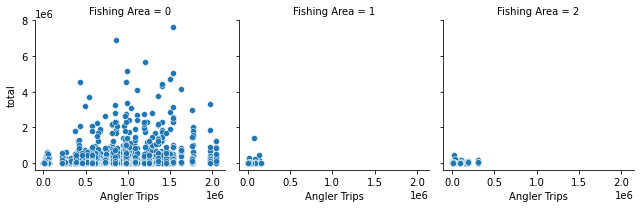

In [213]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.scatterplot,'Angler Trips','total')

<AxesSubplot:xlabel='total'>

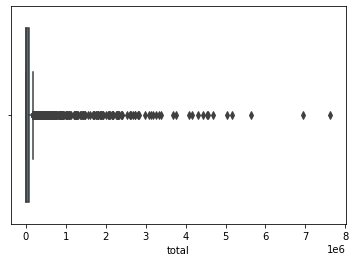

In [214]:
sns.boxplot(x=df['total'])

<AxesSubplot:>

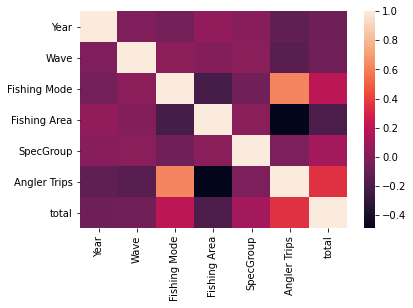

In [243]:
corr = df1.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='Fishing Mode', ylabel='Angler Trips'>

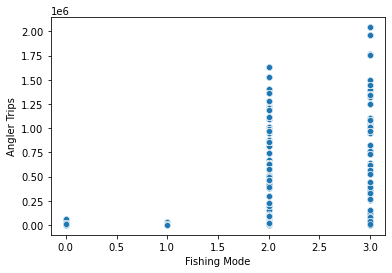

In [247]:
sns.scatterplot(data=df1, x="Fishing Mode", y="Angler Trips")

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 1000000.0)

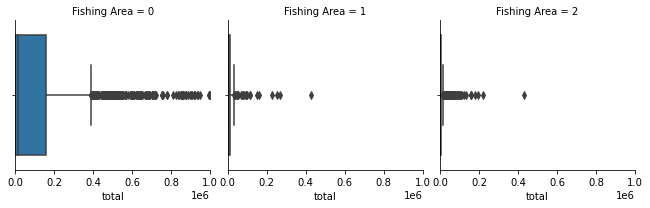

In [244]:
g = sns.FacetGrid(col='Fishing Area',data=df1,legend_out=False)
g.map(sns.boxplot,'total')
plt.xlim(0, 1000000)

C:\Users\hindm\Anaconda\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


(0.0, 1000000.0)

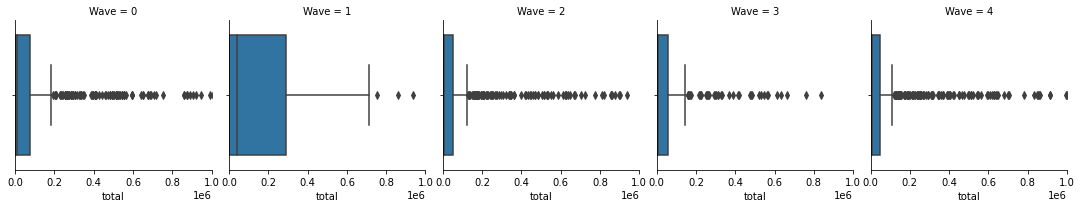

In [245]:
g = sns.FacetGrid(col='Wave',data=df1,legend_out=False)
g.map(sns.boxplot,'total')
plt.xlim(0, 1000000)

In [24]:
#looking for an outlier using z-score
from scipy import stats
z = np.abs(stats.zscore(df['total']))
print(z)

[0.29196507 0.12413102 0.34646815 ... 0.00532011 0.31024667 0.27825582]


In [25]:
#set threshold to 3 std deviations
threshold = 3
print(np.where(z > 3))

(array([   4,   68,   90,   94,  149,  152,  160,  182,  260,  459,  543,
        598,  644,  654,  662,  712,  722,  723,  733,  734,  781,  791,
        792,  841,  866,  867,  875,  886,  888,  894,  941,  944,  952,
        953, 1065, 1106, 1123, 1130, 1192, 1194, 1205, 1264, 1296, 1434,
       1512, 1513, 1540, 1570, 1623, 1624, 1723, 1724, 1852, 1938, 1954,
       2026, 2030, 2042, 2043, 2182, 2364, 2365, 2504, 2698, 2711, 2712,
       2727, 2805, 2806], dtype=int64),)


C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hindm\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

(0.0, 1000000.0)

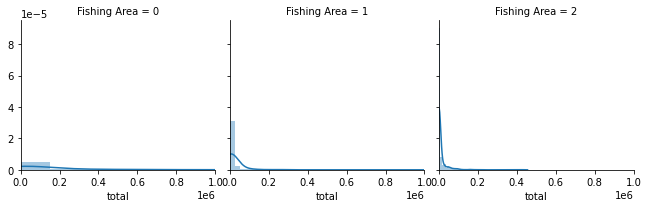

In [26]:
g = sns.FacetGrid(col='Fishing Area',data=df,legend_out=False)
g.map(sns.distplot,'total')
plt.xlim(0, 1000000)

In [248]:
#Total catch varies such a large amount. I'm going to incorporate a catch per trip column, which divides the total catch
#by the number of angler trips recorded.

df1['CatchPerTrip'] = np.where(df1['total'] < 1, df1['total'], df1['total']/df1['Angler Trips'])
df1.head()

,Year,Wave,Fishing Mode,Fishing Area,SpecGroup,SubGroup,Angler Trips,total,CatchPerTrip
0,2010,1,3,0,1,SKATES/RAYS,730139,10143,0.013892
1,2010,1,3,0,2,FRESHWATER CATFISHES,730139,96256,0.131832
2,2010,1,3,0,11,OTHER FISHES,730139,337713,0.462532
3,2010,1,3,0,17,STRIPED BASS,730139,714968,0.979222
4,2010,1,3,0,17,WHITE PERCH,730139,2616125,3.583051


<AxesSubplot:>

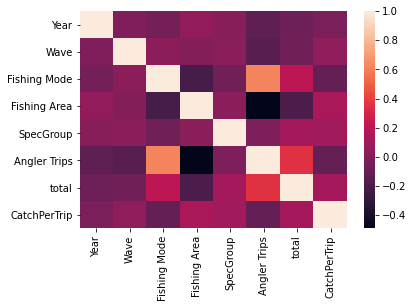

In [249]:
corr = df1.corr()
sns.heatmap(corr)

In [251]:
floatdf = df1.drop(columns=['SubGroup'])

In [252]:
df = floatdf.rename(columns={"Fishing Mode": "Mode", "Fishing Area": "Area", "Angler Trips": "AnglerTrips"})
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051


In [173]:
from patsy import dmatrices
import statsmodels.api as sm

In [174]:
np.random.seed(47)
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=2242
Testing data set length=606


In [176]:
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051


In [177]:
expr = """CatchPerTrip ~ Mode  + Area + Wave """

In [178]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [179]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [180]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           CatchPerTrip   No. Observations:                 2242
Model:                            GLM   Df Residuals:                     2238
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4454.9
Date:                Wed, 10 Feb 2021   Deviance:                       6721.2
Time:                        19:20:49   Pearson chi2:                 1.82e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2458      0.057     -4.343      0.0

In [181]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
#.summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

          mean   mean_se  mean_ci_lower  mean_ci_upper
1     0.261091  0.014739       0.233745       0.291638
17    0.394062  0.016464       0.363079       0.427689
20    0.394062  0.016464       0.363079       0.427689
24    0.513882  0.025718       0.465868       0.566844
27    0.513882  0.025718       0.465868       0.566844
...        ...       ...            ...            ...
2828  2.303977  0.071129       2.168701       2.447691
2834  1.526533  0.058794       1.415540       1.646228
2841  0.519092  0.019835       0.481635       0.559461
2843  0.519092  0.019835       0.481635       0.559461
2846  0.519092  0.019835       0.481635       0.559461

[606 rows x 4 columns]


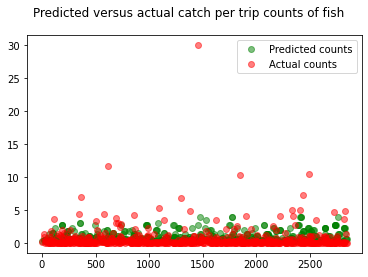

In [182]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['CatchPerTrip']
fig = plt.figure()
fig.suptitle('Predicted versus actual catch per trip counts of fish')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts', alpha=0.5, linestyle='none') #check
actual, = plt.plot(X_test.index, actual_counts, 'ro-', label='Actual counts', alpha=0.5, linestyle='none')
plt.legend(handles=[predicted, actual])
plt.show()

In [183]:
print('Poisson RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts,actual_counts),2)))))

Poisson RMSE=44.19149935076705


<Figure size 432x288 with 0 Axes>

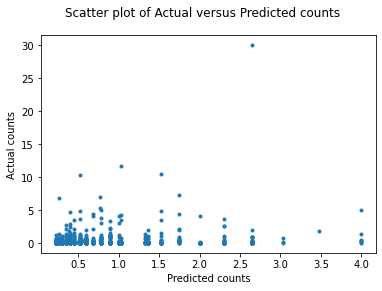

In [184]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

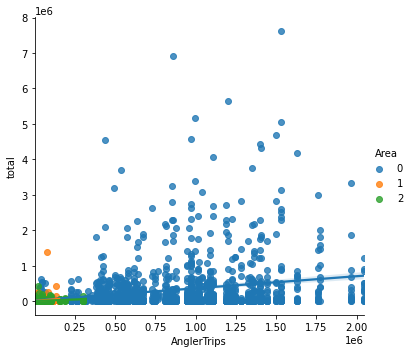

In [185]:
sns.lmplot(x='AnglerTrips', y='total', data=df, hue='Area')
plt.show()

In [186]:
#zero inflated poisson model
df.head(10)

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.013892
1,2010,1,3,0,2,730139,96256,0.131832
2,2010,1,3,0,11,730139,337713,0.462532
3,2010,1,3,0,17,730139,714968,0.979222
4,2010,1,3,0,17,730139,2616125,3.583051
5,2010,1,1,2,3,788,47,0.059645
6,2010,1,1,2,6,788,31,0.039340
7,2010,1,1,2,15,788,94,0.119289
8,2010,1,1,2,21,788,63,0.079949
9,2010,1,1,2,21,788,3924,4.979695


In [187]:
print(len(df[df['CatchPerTrip'] < 1]))

2415


In [188]:
#realized there are a lot of numbers <1 in CatchPerTrip. Since there is no such thing as half a fish, I'm reducing these numbers to zero.
df.CatchPerTrip[df.CatchPerTrip < 1] = 0
df.groupby('CatchPerTrip').count()

<ipython-input-188-1da74abf8ced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.CatchPerTrip[df.CatchPerTrip < 1] = 0


,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total
CatchPerTrip,,,,,,,
0.000000,2415,2415,2415,2415,2415,2415,2415
1.000000,3,3,3,3,3,3,3
1.004530,1,1,1,1,1,1,1
1.007584,1,1,1,1,1,1,1
1.010653,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...
38.800000,1,1,1,1,1,1,1
45.327911,1,1,1,1,1,1,1
46.910665,1,1,1,1,1,1,1


In [189]:
df.head()

,Year,Wave,Mode,Area,SpecGroup,AnglerTrips,total,CatchPerTrip
0,2010,1,3,0,1,730139,10143,0.000000
1,2010,1,3,0,2,730139,96256,0.000000
2,2010,1,3,0,11,730139,337713,0.000000
3,2010,1,3,0,17,730139,714968,0.000000
4,2010,1,3,0,17,730139,2616125,3.583051


In [190]:
np.random.seed(47)
mask = np.random.rand(len(df)) < 0.8
df_train2 = df[mask]
df_test2 = df[~mask]
print('Training data set length='+str(len(df_train2)))
print('Testing data set length='+str(len(df_test2)))

Training data set length=2242
Testing data set length=606


In [191]:
expr2 = 'CatchPerTrip ~ Mode + Area + Wave'

In [192]:
y_train2, X_train2 = dmatrices(expr2, df_train2, return_type='dataframe')
y_test2, X_test2 = dmatrices(expr2, df_test2, return_type='dataframe')

In [193]:
model = sm.ZeroInflatedPoisson(endog=y_train2, exog=X_train2, exog_infl=X_train2, inflation='logit')
zip_training_results = model.fit()

Optimization terminated successfully.
         Current function value: 1.071690
         Iterations: 25
         Function evaluations: 28
         Gradient evaluations: 28


C:\Users\hindm\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [194]:
print(zip_training_results.summary())

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:            CatchPerTrip   No. Observations:                 2242
Model:             ZeroInflatedPoisson   Df Residuals:                     2238
Method:                            MLE   Df Model:                            3
Date:                 Wed, 10 Feb 2021   Pseudo R-squ.:                  0.1399
Time:                         19:21:29   Log-Likelihood:                -2402.7
converged:                        True   LL-Null:                       -2793.6
Covariance Type:             nonrobust   LLR p-value:                4.051e-169
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
inflate_Intercept     1.1307      0.137      8.250      0.000       0.862       1.399
inflate_Mode          0.3543      0.062      5.751      0.000       0.234       0.475
inflate_Area    

In [195]:
zip_predictions = zip_training_results.predict(X_test2,exog_infl=X_test2)
predicted_counts2=np.round(zip_predictions)
actual_counts2 = y_test2['CatchPerTrip']

print('ZIP RMSE='+str(np.sqrt(np.sum(np.power(np.subtract(predicted_counts2,actual_counts2),2)))))

ZIP RMSE=45.1852637407254


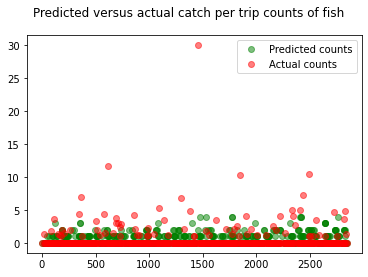

In [196]:
fig = plt.figure()
fig.suptitle('Predicted versus actual catch per trip counts of fish')
predicted, = plt.plot(X_test2.index, predicted_counts2, 'go-', label='Predicted counts', alpha=0.5, linestyle='none') #check
actual, = plt.plot(X_test2.index, actual_counts2, 'ro-', label='Actual counts', alpha=0.5, linestyle='none')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 432x288 with 0 Axes>

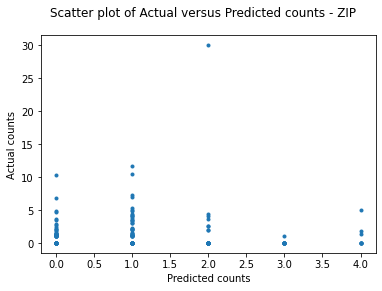

In [197]:
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts - ZIP')
plt.scatter(x=predicted_counts2, y=actual_counts2, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()

In [198]:
from sklearn.model_selection import cross_val_score

In [141]:
scores = cross_val_score(model, df, df['CatchPerTrip'], cv=5)

TypeError: Cannot clone object '<statsmodels.discrete.count_model.ZeroInflatedPoisson object at 0x0000013F20873DC0>' (type <class 'statsmodels.discrete.count_model.ZeroInflatedPoisson'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.